In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import numpy as np
from shapely.geometry import Point


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#Display all columns instead of "..." truncation
pd.options.display.max_columns = None

#No scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#Set plot sizes
plt.rcParams["figure.figsize"] = 10, 10

In [2]:
#Read in taxi data
taxis = pd.read_csv('nyc_taxi.csv')

In [3]:
#Read in geospatial data for New York
ny_state = gpd.read_file('ZillowNeighborhoods-NY.shp')

In [4]:
print(ny_state.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
State       579 non-null object
County      579 non-null object
City        579 non-null object
Name        579 non-null object
RegionID    579 non-null object
geometry    579 non-null object
dtypes: object(6)
memory usage: 13.6+ KB
None


In [5]:
#Locate duplicate regions
ny_state[ny_state['RegionID'].duplicated()]

,State,County,City,Name,RegionID,geometry
246,NY,New York,New York,Marble Hill,270880,POLYGON ((-73.91071526499991 40.87890143900006...
282,NY,Kings,New York,Vinegar Hill,270960,POLYGON ((-73.97901955399993 40.70666396400009...
310,NY,Bronx,New York,Rikers Island,270922,"POLYGON ((-73.8865870059999 40.79891837000008,..."
375,NY,New York,New York,Brooklyn Heights,403122,POLYGON ((-73.99610507599969 40.70422567500025...


In [6]:
#Investigate one of the duplicate regions
ny_state[ny_state['RegionID'] == '270960']

,State,County,City,Name,RegionID,geometry
281,NY,New York,New York,Vinegar Hill,270960,POLYGON ((-73.97901955399993 40.70666396400009...
282,NY,Kings,New York,Vinegar Hill,270960,POLYGON ((-73.97901955399993 40.70666396400009...


In [7]:
#Drop duplicate regions
ny_state = ny_state.loc[ny_state['RegionID'].drop_duplicates().index]

In [8]:
#Check that all regions are unique (output should be 1)
ny_state['RegionID'].nunique(dropna = True) / len(ny_state['RegionID'])

1.0

In [9]:
#Set index to region ID
ny_state['RegionID'] = ny_state['RegionID'].astype('int')
ny_state = ny_state.set_index(['RegionID'])
ny_state = ny_state.sort_index()

In [10]:
#All data come from the same state, drop state column
ny_state = ny_state.drop('State', axis=1)

In [11]:
#Convert columns to categoricals
def convert_to_categorical(df, cols):
    """Locate columns with low number of unique values and convert them to categoricals"""
    for col in cols:
        unique_vals = len(df[col].unique())
        unique_ratio = unique_vals / len(df[col])
        if unique_ratio < 0.2:
            df[col] = df[col].astype('category')
    return df

In [12]:
#List columns of ny_state Dataframe
columns = list(ny_state.select_dtypes(include=['object']).columns.values)
columns.remove('geometry')
print(columns)

['County', 'City', 'Name']


In [13]:
#Convert columns to categoricals
convert_to_categorical(ny_state, columns)

,County,City,Name,geometry
RegionID,,,,
3698,Wyoming,Eagle,Bliss,"POLYGON ((-78.23548 42.603406, -78.235438 42.5..."
3736,Suffolk,Town of Islip,Bohemia,POLYGON ((-73.14422599999978 40.78667100000015...
4083,Rockland,Ramapo,Chestnut Ridge,POLYGON ((-74.05993899999993 41.10123000000004...
4257,Westchester,Yorktown,Crompond,"POLYGON ((-73.82453700000001 41.305756, -73.82..."
4819,Queens,New York,Fresh Meadows,"POLYGON ((-73.7699123773972 40.74150740314482,..."
4982,Suffolk,Huntington,Greenlawn,POLYGON ((-73.35160499999995 40.87515100000007...
5061,Nassau,Great Neck,Harbor Hills,POLYGON ((-73.74329099999994 40.79097000000007...
5397,Nassau,Great Neck,Kensington,POLYGON ((-73.70949799999994 40.79300700000005...
5837,Queens,New York,Maspeth,"POLYGON ((-73.8881191182047 40.73555656190326,..."


In [14]:
print(ny_state.info(verbose=False))

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 575 entries, 3698 to 764316
Columns: 4 entries, County to geometry
dtypes: category(2), object(2)
memory usage: 12.3+ KB
None


In [15]:
ny_state.drop('geometry', axis=1).describe()

,County,City,Name
count,575,575,575
unique,24,50,558
top,Queens,New York,Downtown
freq,70,274,5


In [16]:
nyc = ny_state.loc[ny_state['City'] == 'New York']
nyc.shape

(274, 4)

In [17]:
taxis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291372 entries, 0 to 291371
Data columns (total 28 columns):
Unnamed: 0           291372 non-null int64
pickup_datetime      291372 non-null object
dropoff_datetime     291372 non-null object
passenger_count      291372 non-null int64
pickup_longitude     291372 non-null float64
pickup_latitude      291372 non-null float64
dropoff_longitude    291372 non-null float64
dropoff_latitude     291372 non-null float64
trip_duration        291372 non-null int64
date                 291372 non-null object
station_num          291372 non-null object
station_name         291372 non-null object
station_latitude     291372 non-null float64
station_longitude    291372 non-null float64
average_wind         291372 non-null float64
precipitation        291372 non-null float64
snowfall             291372 non-null float64
snow_depth           291372 non-null float64
avg_temp             291372 non-null float64
max_temp             291372 non-null float64


In [18]:
#Remove column that stores duplicate index
taxis = taxis.iloc[:,1:]

In [19]:
#Set index to datetime of pickup
taxis['pickup_datetime'] = pd.to_datetime(taxis['pickup_datetime'])
datetime_ind = list(taxis['pickup_datetime'])
taxis.index = datetime_ind
#Set drop off to datetime
taxis['dropoff_datetime'] = pd.to_datetime(taxis['dropoff_datetime'])

In [20]:
#While we're at it, pair the datetimes with their respective days of the week
day_of_week = [x.weekday() for x in datetime_ind]
taxis['day_of_week'] = day_of_week

In [21]:
#Create a separate column with the names of the weekdays in case they're needed later
weekday_dict = {0: 'Monday',
               1: 'Tuesday',
               2: 'Wednesday',
               3: 'Thursday',
               4: 'Friday',
               5: 'Saturday',
               6: 'Sunday'}
taxis['weekday_name'] = taxis['day_of_week'].map(weekday_dict)

In [22]:
#Change days of week to categoricals
taxis['day_of_week'] = taxis['day_of_week'].astype('category').cat.as_ordered()
taxis['weekday_name'] = taxis['weekday_name'].astype('category')

In [23]:
#Convert taxis dataframe to geodataframe for plotting
geometry = [Point(xy) for xy in zip(taxis['pickup_longitude'], taxis['pickup_latitude'])]
crs = {'init': 'epsg:4269'}
taxis_geo = gpd.GeoDataFrame(taxis, crs=crs, geometry=geometry)

In [ ]:
pickup_geometry = [Point(xy) for xy in zip(taxis['pickup_longitude'], taxis['pickup_latitude'])]
dropoff_geometry = [Point(xy) for xy in zip(taxis['dropoff_longitude'], taxis['dropoff_latitude'])]


In [24]:
xmin = -74.3
xmax = -73.72
ymin = 40.47
ymax = 40.92

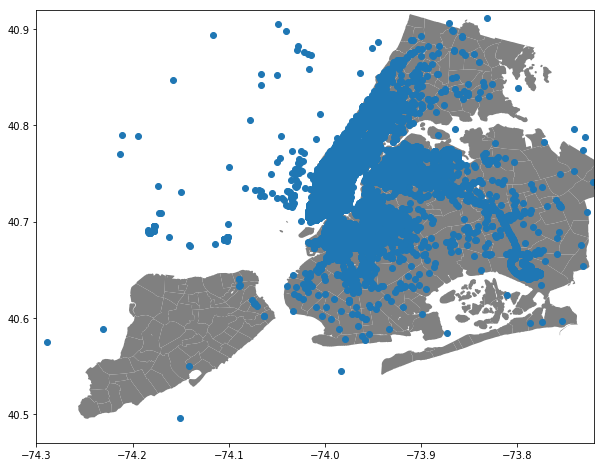

In [25]:
taxis_geo.plot(ax=nyc.plot(facecolor='gray'))
plt.axis([xmin, xmax, ymin, ymax])
plt.show()

We can see that the pickup coordinates may not always be 100% accurate, since some of them appear to be in areas where there is no land. The area directly west of Manhattan and north of Staten Island is where New Jersey would be, so some pickups are being made out there as well.

### Frequency Analysis

In [26]:
nyc_taxi = gpd.sjoin(nyc, taxis_geo, how='inner', op='intersects')

In [27]:
nyc_dict = dict(zip(nyc['Name'], nyc['geometry']))
nyc_count = nyc_taxi[['Name','trip_duration']].groupby('Name').count().reset_index()
nyc_count = gpd.GeoDataFrame(nyc_count, crs={'init': 'epsg:4269'}, geometry=nyc_count['Name'].map(nyc_dict))
nyc_count.columns = ['Name','count','geometry']

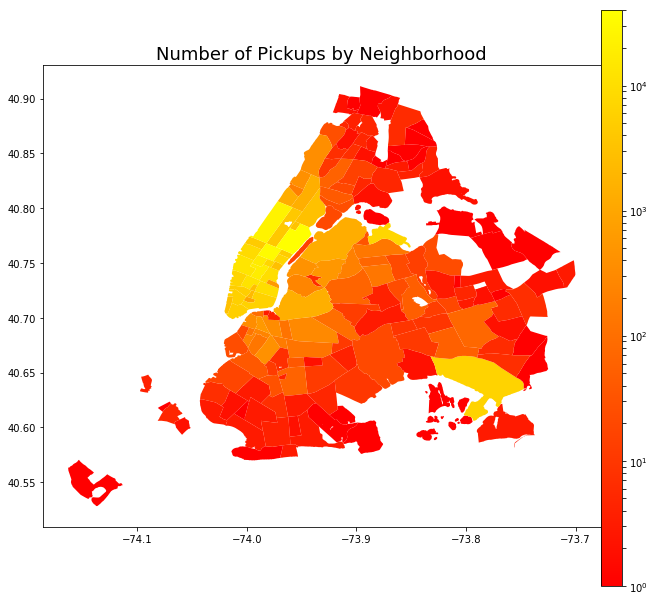

In [28]:
import matplotlib.colors as colors
style='autumn'
vmin, vmax = nyc_count['count'].min(), nyc_count['count'].max()
ax = nyc_count.plot(column='count', cmap=style, norm=colors.LogNorm(vmin=vmin, vmax=vmax))
fig = ax.get_figure()
plt.title('Number of Pickups by Neighborhood', {'fontsize': 18})
cax = fig.add_axes([0.9, 0.1, 0.03, 0.8])
sm = plt.cm.ScalarMappable(cmap=style, norm=colors.LogNorm(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm, cax=cax)
plt.show()

The logarithmic-scaled heatmap above displays only neighborhoods that had at least one pickup between 1/1/16 and 6/30/16. In general, we see that most cabs are picking up passengers in Manhattan, with a large number of pickups also occurring at JFK and LaGuardia Airports. Some neighborhoods in North Brooklyn and Western Queens see a moderate number of pickups as well.

### Map Drop Off Locations

In [29]:
taxis_drop = taxis[['trip_duration','dropoff_longitude','dropoff_latitude']]

In [30]:
geometry = [Point(xy) for xy in zip(taxis['dropoff_longitude'], taxis['dropoff_latitude'])]
crs = {'init': 'epsg:4269'}
taxis_geo_drop = gpd.GeoDataFrame(taxis_drop, crs=crs, geometry=geometry)

In [31]:
taxis_drop_sliced = taxis_geo_drop[['trip_duration','geometry']]
nyc_taxi_dropoffs = gpd.sjoin(nyc, taxis_drop_sliced, how='inner', op='intersects')

In [32]:
#Use same dictionary from previous plot
nyc_drop_count = nyc_taxi_dropoffs[['Name','trip_duration']].groupby('Name').count().reset_index()
nyc_drop_count = gpd.GeoDataFrame(nyc_drop_count, crs={'init': 'epsg:4269'}, geometry=nyc_drop_count['Name'].map(nyc_dict))
nyc_drop_count.columns = ['Name','count','geometry']

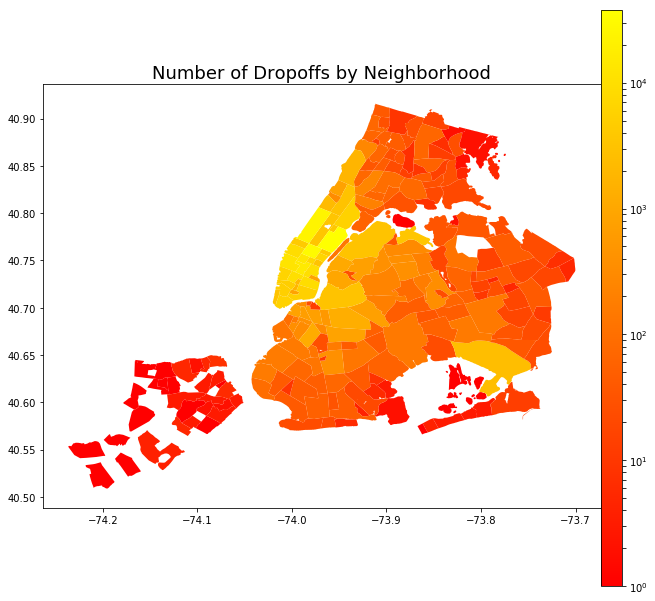

In [33]:
vmin, vmax = nyc_drop_count['count'].min(), nyc_drop_count['count'].max()
ax = nyc_drop_count.plot(column='count', cmap=style, norm=colors.LogNorm(vmin=vmin, vmax=vmax))
fig = ax.get_figure()
plt.title('Number of Dropoffs by Neighborhood', {'fontsize': 18})
cax = fig.add_axes([0.9, 0.1, 0.03, 0.8])
sm = plt.cm.ScalarMappable(cmap=style, norm=colors.LogNorm(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm, cax=cax)
plt.show()

The dropoffs appear to be more spread out than the pickups, as some neighborhoods in the outer boroughs appear lighter in this plot. Additionally, there are neighborhoods in Staten Island and Far Rockaway that appear on this plot because they recorded dropoffs, but do not appear in the previous plot since they recorded no pickups. This means that passengers are hailing cabs in more centrally located parts of the city and taking them to outlying neighborhoods and then cabs are immediately returning to the more centrally located places without passengers.

In [34]:
#Take monthly count of data
monthly_count = taxis['pickup_datetime'].resample('M').count()
months = monthly_count.index
month_labels = months.strftime('%b')

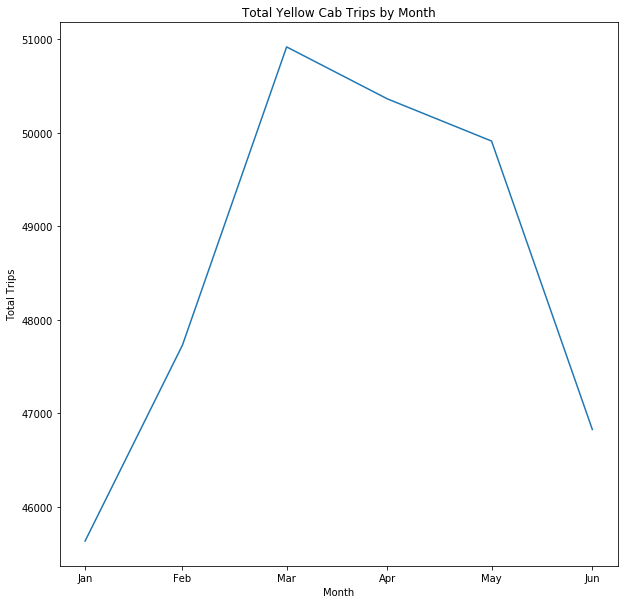

In [35]:
plt.plot(monthly_count)
plt.xticks(months, month_labels)
plt.xlabel('Month')
plt.ylabel('Total Trips')
plt.title('Total Yellow Cab Trips by Month')
plt.show()

The total trip count is lowest in January and highest in March, however this graph isn't very helpful since the number of days in each month varies.

In [36]:
#Take daily count of data
daily_trips = taxis['pickup_datetime'].resample('D').count()

In [37]:
#Rolling 7-day average
smoothed_7d = daily_trips.rolling(window=7).mean()
#Rolling 30-day average
smoothed_30d = daily_trips.rolling(window=30).mean()

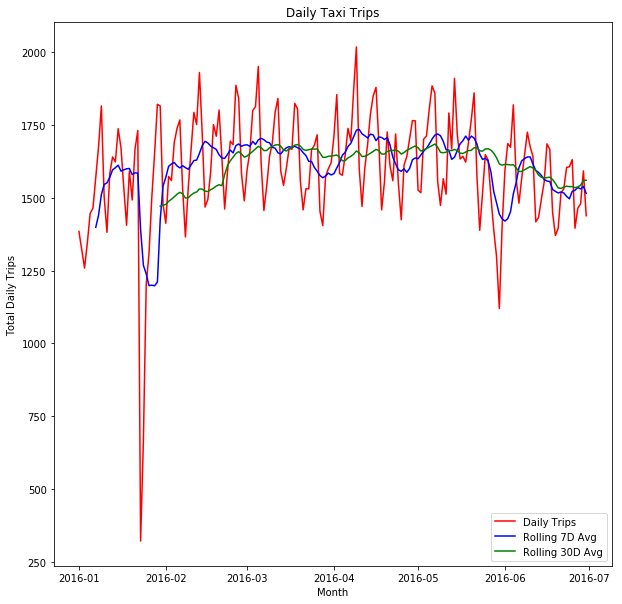

In [38]:
#Plot daily taxi trips with moving averages
plot1, = plt.plot(daily_trips, color='red')
plot2, = plt.plot(smoothed_7d, color='blue')
plot3, = plt.plot(smoothed_30d, color='green')
plt.xlabel('Month')
plt.ylabel('Total Daily Trips')
plt.title('Daily Taxi Trips')
plt.legend([plot1, plot2, plot3], ['Daily Trips','Rolling 7D Avg','Rolling 30D Avg'], loc='lower right')
plt.show()

Looking at the 30-day rolling average, it appears that demand for taxis is pretty steady but is slightly higher in March and April. The daily trip count shows us that the number of trips sees peaks and valleys on a weekly basis, most likely peaking on Friday or Saturday. Also, we see that taxi demand was unusually low one day in January and one day in late May. These outliers are investigated below.

In [39]:
#Find outlier in January
daily_trips.loc['2016-01']

index_right
2016-01-01    1385
2016-01-02    1321
2016-01-03    1259
2016-01-04    1346
2016-01-05    1447
2016-01-06    1465
2016-01-07    1572
2016-01-08    1676
2016-01-09    1816
2016-01-10    1504
2016-01-11    1382
2016-01-12    1584
2016-01-13    1641
2016-01-14    1624
2016-01-15    1738
2016-01-16    1673
2016-01-17    1535
2016-01-18    1406
2016-01-19    1592
2016-01-20    1493
2016-01-21    1667
2016-01-22    1732
2016-01-23     321
2016-01-24     667
2016-01-25    1203
2016-01-26    1309
2016-01-27    1502
2016-01-28    1654
2016-01-29    1822
2016-01-30    1816
2016-01-31    1479
Freq: D, Name: pickup_datetime, dtype: int64

In [40]:
#Check weather for January 23rd
taxis.loc['2016-01-23'].iloc[:,-18:].head()

,station_longitude,average_wind,precipitation,snowfall,snow_depth,avg_temp,max_temp,min_temp,fog,fog_heavy,thunder,ice_pellets,glaze,smoke_haze,blowing_snow,day_of_week,weekday_name,geometry
index_right,,,,,,,,,,,,,,,,,,
2016-01-23 01:16:58,-73.880,24.160,2.400,27.900,7.000,28.000,28.000,25.000,True,True,False,False,False,False,True,5,Saturday,POINT (-74.00491333007811 40.72830963134766)
2016-01-23 00:19:01,-73.880,24.160,2.400,27.900,7.000,28.000,28.000,25.000,True,True,False,False,False,False,True,5,Saturday,POINT (-73.99310302734375 40.69293975830078)
2016-01-23 00:56:53,-73.880,24.160,2.400,27.900,7.000,28.000,28.000,25.000,True,True,False,False,False,False,True,5,Saturday,POINT (-73.98740386962891 40.74761581420898)
2016-01-23 01:42:47,-73.880,24.160,2.400,27.900,7.000,28.000,28.000,25.000,True,True,False,False,False,False,True,5,Saturday,POINT (-73.97232055664063 40.75915145874024)
2016-01-23 03:39:30,-73.880,24.160,2.400,27.900,7.000,28.000,28.000,25.000,True,True,False,False,False,False,True,5,Saturday,POINT (-73.98978424072266 40.72913360595703)


A large snow storm on January 23rd caused many people to stay inside. Additionally, it was a Saturday which meant fewer people were obligated to go anywhere.

In [41]:
#Find outlier in late May
daily_trips.loc['2016-05']

index_right
2016-05-01    1527
2016-05-02    1518
2016-05-03    1702
2016-05-04    1713
2016-05-05    1806
2016-05-06    1885
2016-05-07    1860
2016-05-08    1556
2016-05-09    1474
2016-05-10    1566
2016-05-11    1513
2016-05-12    1792
2016-05-13    1668
2016-05-14    1911
2016-05-15    1717
2016-05-16    1634
2016-05-17    1643
2016-05-18    1623
2016-05-19    1692
2016-05-20    1769
2016-05-21    1861
2016-05-22    1577
2016-05-23    1389
2016-05-24    1516
2016-05-25    1649
2016-05-26    1630
2016-05-27    1505
2016-05-28    1391
2016-05-29    1299
2016-05-30    1120
2016-05-31    1404
Freq: D, Name: pickup_datetime, dtype: int64

In [42]:
#Weather on May 30
taxis.loc['2016-05-30'].head()

,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,date,station_num,station_name,station_latitude,station_longitude,average_wind,precipitation,snowfall,snow_depth,avg_temp,max_temp,min_temp,fog,fog_heavy,thunder,ice_pellets,glaze,smoke_haze,blowing_snow,day_of_week,weekday_name,geometry
index_right,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-05-30 04:01:54,2016-05-30 04:01:54,2016-05-30 04:16:24,5,-73.993,40.722,-73.999,40.673,870,2016-05-30 00:00:00,USW00014732,"LA GUARDIA AIRPORT, NY US",40.779,-73.880,7.610,1.530,0.000,0.000,74.000,82.000,69.000,True,False,False,False,False,False,False,0,Monday,POINT (-73.99329376220702 40.72245025634766)
2016-05-30 03:20:26,2016-05-30 03:20:26,2016-05-30 03:58:49,1,-74.003,40.734,-73.965,40.603,2303,2016-05-30 00:00:00,USW00014732,"LA GUARDIA AIRPORT, NY US",40.779,-73.880,7.610,1.530,0.000,0.000,74.000,82.000,69.000,True,False,False,False,False,False,False,0,Monday,POINT (-74.00274658203125 40.73357772827149)
2016-05-30 18:44:24,2016-05-30 18:44:24,2016-05-30 19:06:04,1,-73.984,40.725,-74.000,40.763,1300,2016-05-30 00:00:00,USW00014732,"LA GUARDIA AIRPORT, NY US",40.779,-73.880,7.610,1.530,0.000,0.000,74.000,82.000,69.000,True,False,False,False,False,False,False,0,Monday,POINT (-73.98416137695313 40.72518920898438)
2016-05-30 20:47:12,2016-05-30 20:47:12,2016-05-30 20:50:34,1,-73.973,40.794,-73.967,40.803,202,2016-05-30 00:00:00,USW00014732,"LA GUARDIA AIRPORT, NY US",40.779,-73.880,7.610,1.530,0.000,0.000,74.000,82.000,69.000,True,False,False,False,False,False,False,0,Monday,POINT (-73.97261810302734 40.79381561279297)
2016-05-30 13:40:07,2016-05-30 13:40:07,2016-05-30 13:45:29,1,-73.986,40.746,-73.978,40.751,322,2016-05-30 00:00:00,USW00014732,"LA GUARDIA AIRPORT, NY US",40.779,-73.880,7.610,1.530,0.000,0.000,74.000,82.000,69.000,True,False,False,False,False,False,False,0,Monday,POINT (-73.98595428466798 40.74616622924805)


May 30, 2016 was a Monday which is somewhat unexpected given that taxi demand is usually pretty steady on business days. There was some precipitation and fog, but the temperature was pretty warm. However, a quick Google search reveals that May 30, 2016 was Memorial Day! This is a widely observed federal holiday in the U.S. that occurs on the last Monday in May, so not many people work on that day.

In [43]:
weekday = [x.weekday() for x in list(daily_trips.index)]
trips_by_weekday = pd.DataFrame({'weekday': weekday, 'trip_count': list(daily_trips)})

In [44]:
trips_by_weekday.groupby('weekday').describe()

trip_count                                                       \
             count     mean     std      min      25%      50%      75%   
weekday                                                                   
0           26.000 1432.500 103.038 1120.000 1398.250 1458.000 1473.250   
1           26.000 1549.308  80.672 1309.000 1516.500 1567.500 1595.750   
2           26.000 1612.654  75.854 1465.000 1555.500 1632.000 1663.000   
3           26.000 1682.308  81.606 1439.000 1636.000 1686.500 1720.500   
4           26.000 1721.769 117.724 1385.000 1674.500 1735.000 1809.000   
5           26.000 1708.269 328.238  321.000 1684.000 1811.000 1858.750   
6           26.000 1499.808 204.884  667.000 1460.250 1551.500 1590.750   

                  
             max  
weekday           
0       1634.000  
1       1702.000  
2       1739.000  
3       1806.000  
4       1887.000  
5       2019.000  
6       1718.000

In [45]:
trips_by_weekday.head()

,trip_count,weekday
0,1385,4
1,1321,5
2,1259,6
3,1346,0
4,1447,1


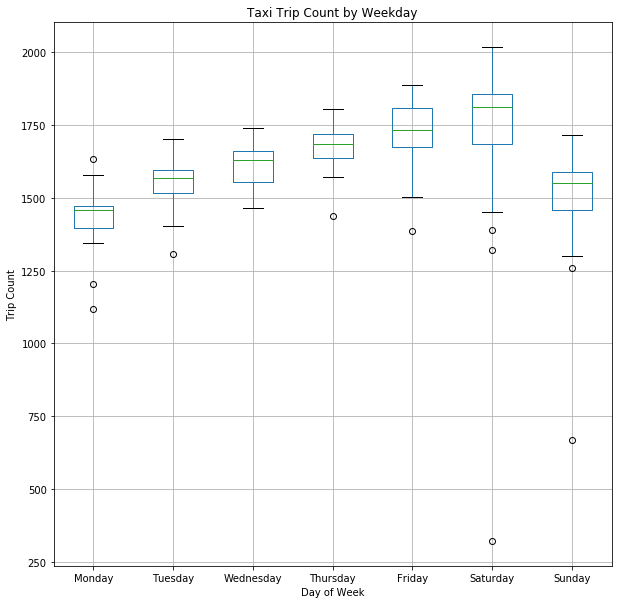

In [46]:
#Boxplot of taxi trips by weekday
trips_by_weekday.pivot(columns='weekday').boxplot()
plt.xlabel('Day of Week')
plt.ylabel('Trip Count')
plt.title('Taxi Trip Count by Weekday')
plt.xticks(np.arange(1,8),('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'))
plt.show()

The demand for taxis gradually increases throughout the week, peaking on Saturday and then dropping significantly on Sunday. The spread of trip counts also appears to increase as the week progresses as the IQR of trip counts is much larger for Friday, Saturday and Sunday.

In [47]:
#Create column indicating weather the day of the week is Mon-Fri
taxis['weekday_type'] = taxis['day_of_week'] <= 4

In [48]:
#Filter down to weekdays and run hourly analysis
hourly_trips = taxis.loc[taxis['weekday_type'] == True, 'pickup_datetime'].resample('H').count()

In [49]:
#Filter weekend dates out of index
hourly_trips = hourly_trips.loc[hourly_trips > 0]

In [50]:
#Create list extracting hours from datetime index
hours = []
for idx, trip in hourly_trips.items():
    hours.append(str(idx)[-8:])

In [51]:
#Create new dataframe with hours and trip count
hourly_trips_df = pd.DataFrame({'hours':hours, 'weekday':list(hourly_trips)})
hourly_summary = hourly_trips_df.groupby(hours).mean()

In [52]:
hourly_trips_weekend = taxis.loc[taxis['weekday_type'] == False, 'pickup_datetime'].resample('H').count()
hourly_trips_weekend = hourly_trips_weekend.loc[hourly_trips_weekend > 0]
hours = []
for idx, trip in hourly_trips_weekend.items():
    hours.append(str(idx)[-8:])
hourly_trips_df2 = pd.DataFrame({'hours':hours, 'weekend':list(hourly_trips_weekend)})
hourly_summary2 = hourly_trips_df2.groupby(hours).mean()

In [53]:
hourly_summary2.head()

,weekend
00:00:00,94.078
01:00:00,82.235
02:00:00,66.980
03:00:00,50.686
04:00:00,33.250


In [54]:
hourly_summary = pd.concat([hourly_summary, hourly_summary2], axis=1)

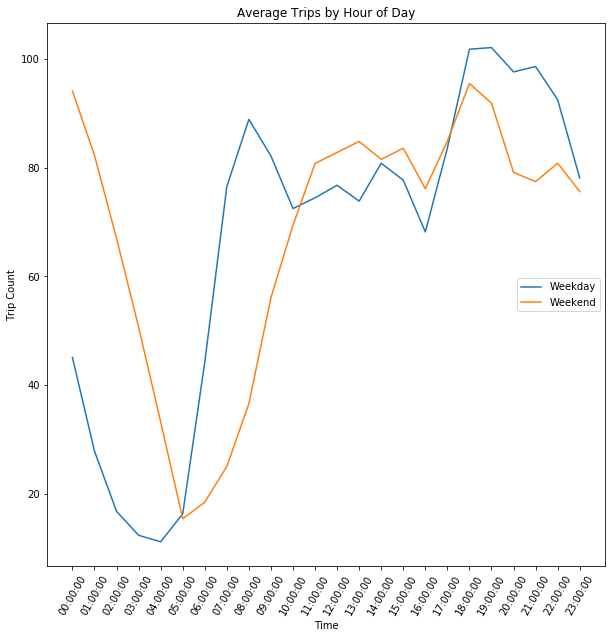

In [55]:
line1, line2, = plt.plot(hourly_summary)
plt.xticks(rotation=60)
plt.xlabel('Time')
plt.ylabel('Trip Count')
plt.title('Average Trips by Hour of Day')
plt.legend((line1, line2), ['Weekday','Weekend'],loc='center right')
plt.show()

On weekdays, the demand for taxis fluctuates quite a bit, hitting peaks around 8-9am and 7-8pm. It is common for people to take taxis to and from work, which explains the morning and afternoon peaks. Additionally, people frequently use taxis during the 2-3 hours immediately after work for various purposes such as work-related events, happy hours, sporting events or simply socializing with friends and family. The total count of trips bottoms out from 3-4am since hardly anyone is out and about during those hours. During the afternoon, there is a moderate dip in demand between 4 and 5pm as cab drivers tend to change shifts during that hour.

On weekends, demand for taxis is highest at midnight and then declines drastically until 5am, at which point it begins to increase, hitting peaks in the early afternoon and again around 7pm.

### Trip Duration

In [56]:
taxis['trip_minutes'] = taxis['trip_duration'].apply(lambda x: x/60)

In [57]:
taxis['trip_minutes'].describe()

count   291372.000
mean        15.854
std         52.431
min          0.017
25%          6.617
50%         11.050
75%         17.917
max       1439.650
Name: trip_minutes, dtype: float64

Trip duration has a few extremely high values that don't seem realistic. A 30,000 minute-long trip is equivalent to 500 hours or almost 21 days.

In [58]:
taxis = taxis.loc[taxis['trip_minutes'] < 30000]

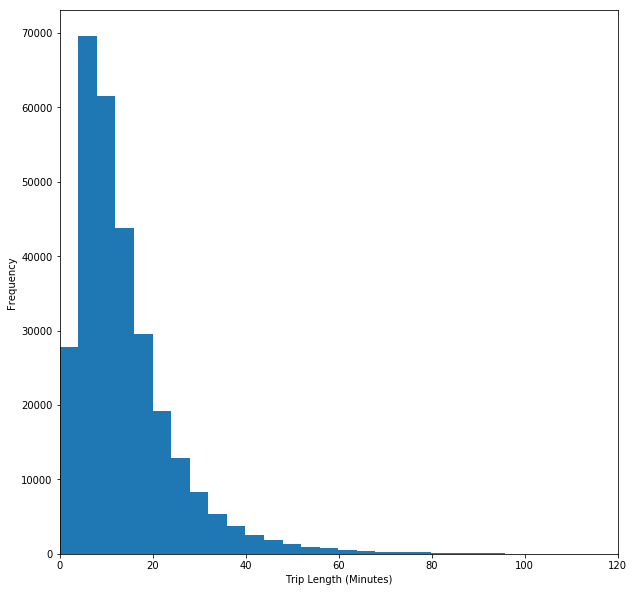

In [59]:
#Trip duration histogram
upper_bound = 120
taxis.loc[taxis['trip_minutes'] <= upper_bound, 'trip_minutes'].plot(kind='hist', bins=30)
plt.xlabel('Trip Length (Minutes)')
plt.xlim((0,upper_bound))
plt.show()

In [60]:
taxis['month'] = taxis['pickup_datetime'].apply(lambda x: x.month)

In [61]:
month_dict = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June'}
taxis['month'] = taxis['month'].astype('category').cat.as_ordered()
taxis['month'] = taxis['month'].map(month_dict)

In [62]:
taxis.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 291372 entries, 2016-01-19 11:35:24 to 2016-01-05 15:56:26
Columns: 33 entries, pickup_datetime to month
dtypes: bool(8), category(2), datetime64[ns](2), float64(14), int64(2), object(5)
memory usage: 50.6+ MB


In [63]:
taxis.head()

,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,date,station_num,station_name,station_latitude,station_longitude,average_wind,precipitation,snowfall,snow_depth,avg_temp,max_temp,min_temp,fog,fog_heavy,thunder,ice_pellets,glaze,smoke_haze,blowing_snow,day_of_week,weekday_name,geometry,weekday_type,trip_minutes,month
index_right,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-19 11:35:24,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979,40.764,-74.005,40.710,2124,2016-01-19 00:00:00,USW00014732,"LA GUARDIA AIRPORT, NY US",40.779,-73.880,21.250,0.000,0.000,0.000,23.000,30.000,18.000,False,False,False,False,False,False,False,1,Tuesday,POINT (-73.97902679443358 40.76393890380859),True,35.400,January
2016-05-10 22:08:41,2016-05-10 22:08:41,2016-05-10 22:29:55,1,-73.983,40.764,-74.002,40.733,1274,2016-05-10 00:00:00,USW00014732,"LA GUARDIA AIRPORT, NY US",40.779,-73.880,6.930,0.000,0.000,0.000,59.000,65.000,51.000,False,False,False,False,False,False,False,1,Tuesday,POINT (-73.98265075683594 40.76383972167969),True,21.233,May
2016-04-09 03:34:27,2016-04-09 03:34:27,2016-04-09 03:41:30,1,-73.996,40.759,-73.993,40.740,423,2016-04-09 00:00:00,USW00014732,"LA GUARDIA AIRPORT, NY US",40.779,-73.880,11.410,0.070,0.000,0.000,41.000,44.000,38.000,False,False,False,False,False,False,False,5,Saturday,POINT (-73.99586486816406 40.7588119506836),False,7.050,April
2016-06-25 10:36:26,2016-06-25 10:36:26,2016-06-25 10:55:49,1,-73.994,40.747,-74.006,40.704,1163,2016-06-25 00:00:00,USW00014732,"LA GUARDIA AIRPORT, NY US",40.779,-73.880,9.620,0.000,0.000,0.000,73.000,83.000,65.000,False,False,False,False,False,False,False,5,Saturday,POINT (-73.99355316162109 40.74717330932617),False,19.383,June
2016-02-14 13:27:56,2016-02-14 13:27:56,2016-02-14 13:49:19,1,-73.957,40.771,-73.975,40.733,1283,2016-02-14 00:00:00,USW00014732,"LA GUARDIA AIRPORT, NY US",40.779,-73.880,13.870,0.000,0.000,0.000,8.000,17.000,1.000,False,False,False,False,False,False,False,6,Sunday,POINT (-73.95658111572266 40.77135848999024),False,21.383,February


What effect does weather have on trip duration?

### Weather's Impact on Taxis

In [64]:
daily_temp = taxis['avg_temp'].resample('D').mean()

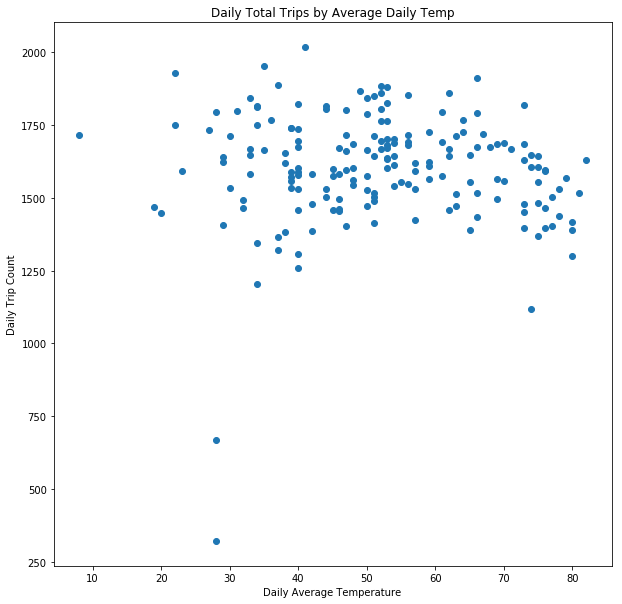

In [65]:
plt.scatter(daily_temp, daily_trips)
plt.xlabel('Daily Average Temperature')
plt.ylabel('Daily Trip Count')
plt.title('Daily Total Trips by Average Daily Temp')
plt.show()

Average daily temperature appears to have little impact on the total count of trips per day.

In [66]:
daily_temp_trips = taxis[['avg_temp', 'trip_duration']].resample('D').mean()

In [67]:
day_of_week = [x.weekday() for x in list(daily_temp_trips.index)]
wkday_wkend = [x < 5 for x in day_of_week]
#Convert this to weekday/weekend only

In [68]:
print(wkday_wkend[:10])

[True, False, False, True, True, True, True, True, False, False]


In [69]:
daily_temp_trips['wkday_wkend'] = wkday_wkend

In [70]:
slope, intercept = np.polyfit(daily_temp_trips['avg_temp'], daily_temp_trips['trip_duration'], deg=1)
trip_prediction = [slope * i + intercept for i in list(daily_temp_trips['avg_temp'])]
daily_temp_trips['trip_prediction'] = trip_prediction

In [71]:
weekday_temp_trips = daily_temp_trips.loc[daily_temp_trips['wkday_wkend'] == True]
weekend_temp_trips = daily_temp_trips.loc[daily_temp_trips['wkday_wkend'] == False]

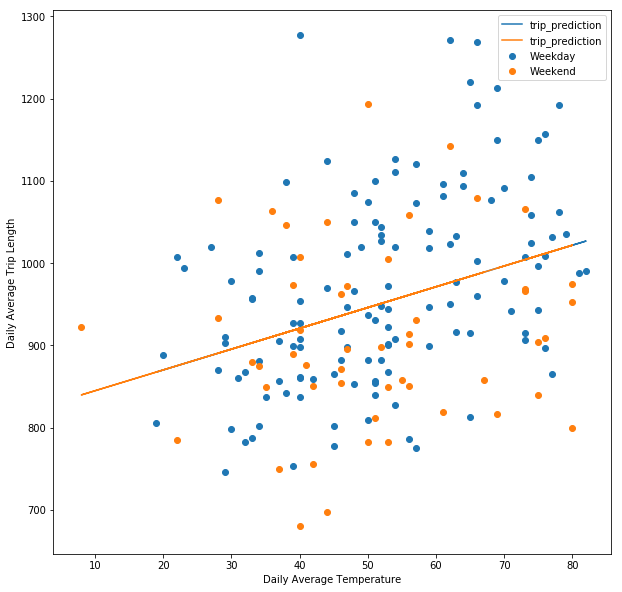

In [72]:
plt.scatter(weekday_temp_trips['avg_temp'], weekday_temp_trips['trip_duration'], label='Weekday')
plt.xlabel('Daily Average Temperature')
plt.ylabel('Daily Average Trip Length')
plt.scatter(weekend_temp_trips['avg_temp'], weekend_temp_trips['trip_duration'], label='Weekend')
plt.plot(weekday_temp_trips['avg_temp'], weekday_temp_trips['trip_prediction'])
plt.plot(weekend_temp_trips['avg_temp'], weekend_temp_trips['trip_prediction'])
plt.legend()
plt.show()

In [73]:
print('Pearson''s Correlation Coefficient:' , np.corrcoef(daily_temp_trips['avg_temp'], daily_temp_trips['trip_duration'])[0][1])

Pearsons Correlation Coefficient: 0.336623354688


As the daily average temperature increases, so does the average trip duration in minutes. This most likely reflects people's tendency to take cabs when travelling short distances during the winter since they prefer not to walk outside when it's cold out.

In [74]:
#Plot precipitation and trip count
daily_precip = taxis['precipitation'].resample('D').mean()

In [41]:
#Boxplot snow and trip duration
snowfall = taxis['snowfall'].resample('D').mean()
snowfall = snowfall > 0

In [64]:
len(daily_trips)

183

In [63]:
len(snowfall)

182

In [62]:
pd.DataFrame({'trip_count': list(daily_trips), 'snowfall':list(snowfall)})

ValueError: arrays must all be same length

In [55]:
snowfall_trips = taxis['snowfall'].loc[taxis['snowfall'] > 0].resample('D').count()
no_snowfall_trips = taxis['snowfall'].loc[taxis['snowfall'] == 0].resample('D').count()

In [59]:
snowfall_trips.astype('float')

2016-01-17   7891.000
2016-01-18      0.000
2016-01-19      0.000
2016-01-20      0.000
2016-01-21      0.000
2016-01-22      0.000
2016-01-23   1648.000
2016-01-24   3383.000
2016-01-25      0.000
2016-01-26      0.000
2016-01-27      0.000
2016-01-28      0.000
2016-01-29      0.000
2016-01-30      0.000
2016-01-31      0.000
2016-02-01      0.000
2016-02-02      0.000
2016-02-03      0.000
2016-02-04      0.000
2016-02-05   8501.000
2016-02-06      0.000
2016-02-07      0.000
2016-02-08   7110.000
2016-02-09      0.000
2016-02-10      0.000
2016-02-11   9116.000
2016-02-12      0.000
2016-02-13      0.000
2016-02-14      0.000
2016-02-15   7373.000
               ...   
2016-02-21      0.000
2016-02-22      0.000
2016-02-23      0.000
2016-02-24      0.000
2016-02-25      0.000
2016-02-26      0.000
2016-02-27      0.000
2016-02-28      0.000
2016-02-29      0.000
2016-03-01      0.000
2016-03-02      0.000
2016-03-03      0.000
2016-03-04   9237.000
2016-03-05      0.000
2016-03-06

#### Location of Pickups for Airport Trips

In [75]:
#GeoDataFrame for dropoff points
geometry = [Point(xy) for xy in zip(taxis['dropoff_longitude'], taxis['dropoff_latitude'])]
crs = {'init': 'epsg:4269'}
taxis_airport = gpd.GeoDataFrame(taxis, crs=crs, geometry=geometry)
taxis_airport = gpd.sjoin(nyc, taxis_airport , how='inner', op='intersects')

In [76]:
#Filter to airport dropoffs only
airport_trips = list(taxis_airport['Name'].apply(lambda x: x.endswith('Airport')))
taxis_airport = taxis_airport.loc[airport_trips]

In [77]:
#GeoDataFrame for origin points of trips to airport
taxis_airport = pd.DataFrame(taxis_airport).drop('geometry', axis=1)
geometry = [Point(xy) for xy in zip(taxis_airport['pickup_longitude'], taxis_airport['pickup_latitude'])]
taxis_airport = gpd.GeoDataFrame(taxis_airport, crs={'init': 'epsg:4269'}, geometry=geometry)
taxis_airport = taxis_airport.drop('index_right', axis=1)

In [78]:
#Join geospatial data for pickup neighborhoods
nyc2 = nyc
nyc2.columns = ['pickup_county','pickup_city','pickup_neighborhood','geometry']
taxis_airport = gpd.sjoin(nyc2, taxis_airport, how='inner', op='intersects')

A look at the top neighborhoods originating trips to the airports:

In [79]:
taxis_airport[['pickup_neighborhood','Name']].groupby('pickup_neighborhood').count().sort_values(by=['Name'], ascending=False).head(10)

,Name
pickup_neighborhood,
Midtown,1294
Upper East Side,593
Upper West Side,375
Flatiron District,360
John F. Kennedy International Airport,337
Garment District,305
Turtle Bay,262
Murray Hill,218
Financial District,197


Midtown is the origin point for the most trips to the airports by far. To anyone who lives in New York, this may not come as a surprise since such a large number of tourists, business travelers and diplomats stay at hotels in midtown. Let's split the data into subsets for JFK and LaGuardia airports.

In [80]:
taxis_lga = taxis_airport.loc[taxis_airport['Name'] == 'La Guardia Airport']
taxis_jfk = taxis_airport.loc[taxis_airport['Name'] == 'John F. Kennedy International Airport']

Here are the top neighborhoods originating trips to LaGuardia Airport:

In [81]:
taxis_lga[['pickup_neighborhood','Name']].groupby('pickup_neighborhood').count().sort_values(by='Name', ascending=False).head(10)

,Name
pickup_neighborhood,
Midtown,850
Upper East Side,379
Upper West Side,217
Flatiron District,210
Garment District,186
Turtle Bay,173
Murray Hill,141
La Guardia Airport,114
Financial District,114


And the top neighborhoods going to JFK:

In [82]:
taxis_jfk[['pickup_neighborhood','Name']].groupby('pickup_neighborhood').count().sort_values(by='Name', ascending=False).head(10)

,Name
pickup_neighborhood,
Midtown,444
John F. Kennedy International Airport,272
Upper East Side,214
Upper West Side,158
Flatiron District,150
Garment District,119
Turtle Bay,89
Gramercy,84
Financial District,83


In [88]:
taxis_jfk['geometry'] = [Point(xy) for xy in zip(taxis_jfk['pickup_longitude'], taxis_jfk['pickup_latitude'])]

C:\Users\Matt\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [157]:
#Plot trips occurring within JFK airport
taxis_jfk.loc[taxis_jfk['pickup_neighborhood'] == 'John F. Kennedy International Airport'].plot(ax=nyc2.loc[nyc2['pickup_neighborhood'] == 'John F. Kennedy International Airport'].plot(), facecolor='gray')
plt.title('Trips Occurring Within JFK Airport')
plt.show()

AttributeError: Unknown property facecolor

ValueError: ordinal must be >= 1

There are a number of hotels, parking and rental car lots within this JFK airport polygon. It is likely that passengers are hailing cabs from the terminals to these locations. It is also possible for a passenger to hail a cab from one terminal to another if they are catching a connecting flight.

C:\Users\Matt\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


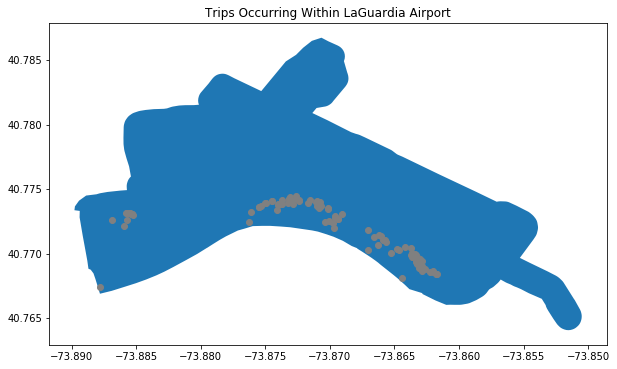

In [154]:
#Plot trips taking place within LGA
taxis_lga['geometry'] = [Point(xy) for xy in zip(taxis_lga['pickup_longitude'], taxis_lga['pickup_latitude'])]
taxis_lga.loc[taxis_lga['pickup_neighborhood'] == 'La Guardia Airport'].plot(ax=nyc2.loc[nyc2['pickup_neighborhood'] == 'La Guardia Airport'].plot(), facecolor='gray')
plt.title('Trips Occurring Within LaGuardia Airport')
plt.show()

The same concept holds true for LaGuardia Airport: people are hailing cabs from the terminals to nearby hotels, rental car lots and parking lots.

#### Where/when are the most airport trips originating?

In [133]:
#Dependent var: number of trips to airport, total number of trips
taxis_jfk = pd.DataFrame(taxis_jfk).drop(['geometry', 'index_right'], axis=1).set_index('pickup_datetime')


In [159]:
#nyc_taxi['to_jfk'] = nyc_taxi['dropoff_neighborhood'] == 'John F. Kennedy International Airport'


,County,City,Name,geometry,index_right,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,date,station_num,station_name,station_latitude,station_longitude,average_wind,precipitation,snowfall,snow_depth,avg_temp,max_temp,min_temp,fog,fog_heavy,thunder,ice_pellets,glaze,smoke_haze,blowing_snow,day_of_week,weekday_name
4819,Queens,New York,Fresh Meadows,"POLYGON ((-73.7699123773972 40.74150740314482,...",2016-03-20 04:55:06,2016-03-20 04:55:06,2016-03-20 05:21:53,4,-73.774,40.736,-73.916,40.825,1607,2016-03-20 00:00:00,USW00014732,"LA GUARDIA AIRPORT, NY US",40.779,-73.880,14.540,0.070,0.100,0.000,39.000,42.000,33.000,True,False,False,False,False,False,False,6,Sunday
4819,Queens,New York,Fresh Meadows,"POLYGON ((-73.7699123773972 40.74150740314482,...",2016-04-28 18:12:08,2016-04-28 18:12:08,2016-04-28 18:17:07,6,-73.783,40.733,-73.783,40.733,299,2016-04-28 00:00:00,USW00014732,"LA GUARDIA AIRPORT, NY US",40.779,-73.880,8.720,0.000,0.000,0.000,53.000,59.000,48.000,False,False,False,False,False,False,False,3,Thursday
4819,Queens,New York,Fresh Meadows,"POLYGON ((-73.7699123773972 40.74150740314482,...",2016-02-26 13:14:07,2016-02-26 13:14:07,2016-02-26 13:22:01,1,-73.786,40.739,-73.786,40.739,474,2016-02-26 00:00:00,USW00014732,"LA GUARDIA AIRPORT, NY US",40.779,-73.880,20.360,0.000,0.000,0.000,37.000,40.000,29.000,False,False,False,False,False,False,False,4,Friday
5837,Queens,New York,Maspeth,"POLYGON ((-73.8881191182047 40.73555656190326,...",2016-06-23 08:46:45,2016-06-23 08:46:45,2016-06-23 09:04:09,1,-73.895,40.743,-73.895,40.743,1044,2016-06-23 00:00:00,USW00014732,"LA GUARDIA AIRPORT, NY US",40.779,-73.880,7.610,0.000,0.000,0.000,74.000,81.000,68.000,False,False,False,False,False,False,False,3,Thursday
5837,Queens,New York,Maspeth,"POLYGON ((-73.8881191182047 40.73555656190326,...",2016-03-18 23:19:45,2016-03-18 23:19:45,2016-03-18 23:23:45,2,-73.896,40.743,-73.883,40.742,240,2016-03-18 00:00:00,USW00014732,"LA GUARDIA AIRPORT, NY US",40.779,-73.880,16.110,0.000,0.000,0.000,53.000,57.000,43.000,False,False,False,False,False,False,False,4,Friday


In [150]:
taxis_jfk['pickup_neighborhood']

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_prepare__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__le__',
 '__len__',
 '__long__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 

### Passenger Count

In [105]:
#Passenger count overall
nyc_taxi['passenger_count'].describe()

count   291181.000
mean         1.666
std          1.315
min          0.000
25%          1.000
50%          1.000
75%          2.000
max          6.000
Name: passenger_count, dtype: float64

In [110]:
taxis_airport['passenger_count'].describe()

count   6019.000
mean       1.696
std        1.318
min        1.000
25%        1.000
50%        1.000
75%        2.000
max        6.000
Name: passenger_count, dtype: float64

The distribution of passenger counts appears to be the same for airport trips and taxi trips in general. Over half of all taxi trips are carrying only one passenger. This leads to more congestion on the city's streets and highways and also means individuals are paying the entire fares on their own rather than splitting fares.

In [120]:
#Passenger count on weekdays vs. weekends
weekend_pass_count = nyc_taxi.loc[nyc_taxi['day_of_week'] >= 5]['passenger_count'].describe()
weekday_pass_count = nyc_taxi.loc[nyc_taxi['day_of_week'] < 5]['passenger_count'].describe()

In [123]:
pd.DataFrame({'weekday':weekday_pass_count, 'weekend':weekend_pass_count})

,weekday,weekend
count,207828.000,83353.000
mean,1.641,1.726
std,1.306,1.335
min,0.000,0.000
25%,1.000,1.000
50%,1.000,1.000
75%,2.000,2.000
max,6.000,6.000
